## My Final Project
By Spencer Murphy

**Created: 4/24/21**

**Last Updated: 5/3/21**


For my final project, I'm choosing to construct a Pokemon "dream team" based on the base total stat found in my data, which is essentially a power rating. The higher the base total, the stronger the pokemon will be. The question I will be attempting to answer is "what does an ideal pokemon dream team look like?" Along with the base total stat, I will look at and graph the top pokemon in terms of atttack, defense, and speed. The file containing the data I will be using was found through this link: https://www.kaggle.com/rounakbanik/pokemon. The data comes straight from Pokemon.com and contains about 800 pokemon ranging from Gen 1 to Gen 7.

In terms of my analysis, I first plan to create a data frame using pandas that will exlcude many of the uncessary keys that are found in my data set. After I create a more polished and straightforward table to work with, I plan to graph the stats for all pokemon included in my data set to see the highest ranked pokemon in each category. I plan to narrow down the top 30 strongest pokemon based on their base totals. I also plan to examine the history of the strongest pokemon in the many books, tv shows, and games to see which ones are the most canonically strong. There is the problem of legendary pokemon, which are known to be stronger than regular. Naturally, one would think that a team of all legendaries would be the closest thing to a "dream team," but I think that's pretty boring. So, I plan to make 2 teams - one consisting of all legendaries and one consisting of regular pokemon just to be fair.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
poke = pd.read_csv('pokemon.csv')
poke.keys()

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

Above are the many keys that are included in my data set. Like I said at the beginning, some of these keys will be eliminated as they won't mean much to my final results. For example, I will probably choose to exclude keys like pokedex_number, percentage_male, and generation.Considering my data is a csv file, we can see my data set as a table below. 

In [3]:
poke.head(10)



,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
5,"['Blaze', 'Solar Power']",0.25,1.0,1.0,2.0,0.5,0.5,0.5,1.0,1.0,...,88.1,6,159,115,100,fire,flying,90.5,1,0
6,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,88.1,7,50,64,43,water,NaN,9.0,1,0
7,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,88.1,8,65,80,58,water,NaN,22.5,1,0
8,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,88.1,9,135,115,78,water,NaN,85.5,1,0
9,"['Shield Dust', 'Run Away']",1.00,1.0,1.0,1.0,1.0,0.5,2.0,2.0,1.0,...,50.0,10,20,20,45,bug,NaN,2.9,1,0


Here is an edited data frame that has the keys that I think are useful in reaching my conclusion. 

In [4]:
pok = poke.drop(labels = ['against_bug', 'against_dark', 'against_dragon', 'against_electric', 'against_fairy', 'against_fight', 'against_fire', 'against_flying', 'against_flying', 'against_ghost', 'against_grass', 'against_ground', 'against_ice', 'against_normal', 'against_poison', 'against_psychic', 'against_rock', 'against_steel', 'against_water', 'base_egg_steps', 'base_happiness', 'capture_rate', 'experience_growth', 'japanese_name', 'percentage_male', 'pokedex_number', 'type1', 'type2', 'generation'], axis = 1)
pok.head(10)

,abilities,attack,base_total,classfication,defense,height_m,hp,name,sp_attack,sp_defense,speed,weight_kg,is_legendary
0,"['Overgrow', 'Chlorophyll']",49,318,Seed Pokémon,49,0.7,45,Bulbasaur,65,65,45,6.9,0
1,"['Overgrow', 'Chlorophyll']",62,405,Seed Pokémon,63,1.0,60,Ivysaur,80,80,60,13.0,0
2,"['Overgrow', 'Chlorophyll']",100,625,Seed Pokémon,123,2.0,80,Venusaur,122,120,80,100.0,0
3,"['Blaze', 'Solar Power']",52,309,Lizard Pokémon,43,0.6,39,Charmander,60,50,65,8.5,0
4,"['Blaze', 'Solar Power']",64,405,Flame Pokémon,58,1.1,58,Charmeleon,80,65,80,19.0,0
5,"['Blaze', 'Solar Power']",104,634,Flame Pokémon,78,1.7,78,Charizard,159,115,100,90.5,0
6,"['Torrent', 'Rain Dish']",48,314,Tiny Turtle Pokémon,65,0.5,44,Squirtle,50,64,43,9.0,0
7,"['Torrent', 'Rain Dish']",63,405,Turtle Pokémon,80,1.0,59,Wartortle,65,80,58,22.5,0
8,"['Torrent', 'Rain Dish']",103,630,Shellfish Pokémon,120,1.6,79,Blastoise,135,115,78,85.5,0
9,"['Shield Dust', 'Run Away']",30,195,Worm Pokémon,35,0.3,45,Caterpie,20,20,45,2.9,0


Below is proof that the base total is essentially a determiner for a pokemon's overall power. Pokemon evolve, and when they evolve they get stronger. Instance 0 is Bulbasaur, a sort of turtle pokemon that has a base total of 318. Instance 1 is Bulbasaur's next evolution, Ivysaur. It clearly has a higher base total at 405. Finally, Instance 2 is Bulbasaur's second and final evolution, Venusaur, who has a base total of 625. This pattern can be seen with every pokemon who harbors the ability to evolve.


In [5]:
poke['base_total'].head()

0    318
1    405
2    625
3    309
4    405
Name: base_total, dtype: int64

Here I've elminated all of the keys besides the names of the pokemon, their base totals, and legendary status (1 is yes, 0 is no) 

In [6]:
pokefix = pok.drop(labels = ['height_m', 'abilities', 'attack', 'classfication', 'hp', 'defense', 'sp_attack', 'sp_defense', 'weight_kg', 'speed'], axis = 1)
pokefix.head(10)

,base_total,name,is_legendary
0,318,Bulbasaur,0
1,405,Ivysaur,0
2,625,Venusaur,0
3,309,Charmander,0
4,405,Charmeleon,0
5,634,Charizard,0
6,314,Squirtle,0
7,405,Wartortle,0
8,630,Blastoise,0
9,195,Caterpie,0


Below we can see the top 30 strongest pokemon according to their base totals. 

In [44]:
pg = pokefix.sort_values('base_total', ascending = False)[:30]
pg

,base_total,name,is_legendary
149,780,Mewtwo,1
383,780,Rayquaza,1
382,770,Groudon,1
381,770,Kyogre,1
492,720,Arceus,1
717,708,Zygarde,1
380,700,Latios,1
372,700,Salamence,0
247,700,Tyranitar,0
444,700,Garchomp,0


<AxesSubplot:xlabel='name'>

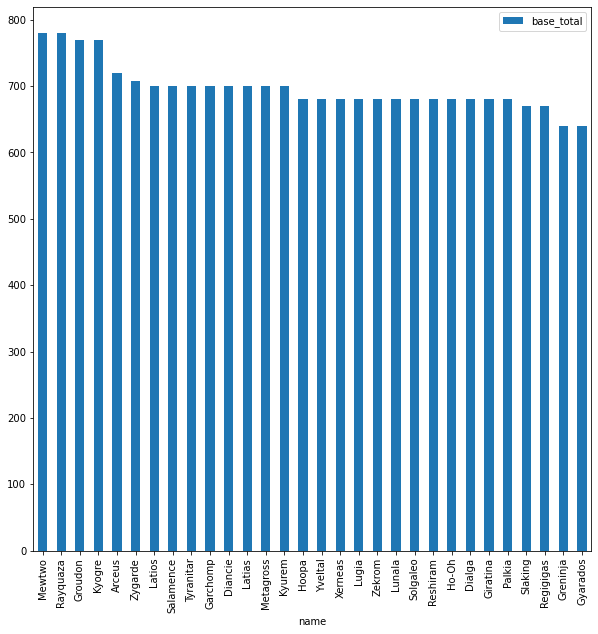

In [64]:
pg.plot(x="name", y="base_total", kind="bar", fontsize= 10, figsize = (10,10))

Above we can see that the top 6 strongest pokemon in terms of their base totals are all legendaries. Considering there are 6 pokemon to a team, these pokemon might be perfect for my legendary team. However, I disagree with some of these ratings. I feel that some should be ranked higher, and vice versa. Going off of the pokemon canon, I think I'd pick these 6 legendaries for my team: Mewtwo, Arceus, Dialga, Palkia, Rayquaza, and Giratina. 

My reasoning? Mewtwo is well known for being one of the most powerful pokemon around. It has the highest base total (tied with Rayquaza, who was also chosen) at 780. Mewtwo was genetically engineered to be an unstoppable force, and at one point its goal was to exterminate all of humanity along with pokemon who sided with humans. Arceus is arguably the most powerful pokemon of all time, as it created the universe from nothing. Dialga, who is a child of Arceus, can control and alter time. Palkia (also a child of Arceus) can manipulate space. Rayquaza is essentially a giant sky dragon who is tied with Mewtwo as having the greatest base total. Finally Giratina, manipulator of antimatter who can travel between dimensions. I guarantee these pokemon would be an unstoppable force if they were to ever team up. 

Below is a table and graph supporting my decision further. As we can see, the "dragon" type has the best average in terms of health, speed, attack, defense, and special attack/defense. Rayquaza, Dialga, Palkia, and Giratina are all dragon types, therefore making them supremely powerful compared to other pokemon.

In [102]:
btype = poke.groupby('type1').mean().get(['hp','speed','attack','defense', 'sp_attack','sp_defense'])
btype = btype.assign(stats_total = btype.sum(axis = 1)).sort_values(by = 'stats_total', ascending = False).get(['stats_total'])
btype

,stats_total
type1,
dragon,522.777778
steel,491.583333
psychic,461.264151
flying,453.333333
fire,450.634615
dark,449.758621
rock,447.266667
electric,436.153846
ghost,434.703704


Text(0, 0.5, 'pokemon types')

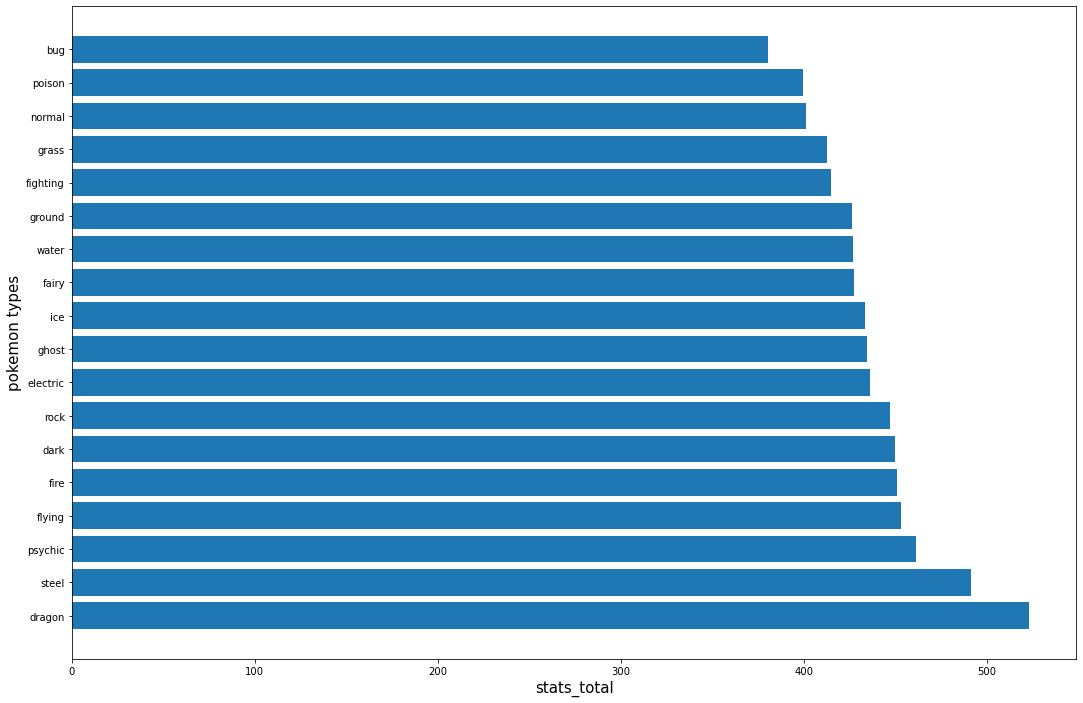

In [113]:
fig, ax = plt.subplots(figsize=(18,12)) 
plt.barh(btype.index, btype.get('stats_total')) 
plt.xlabel('stats_total',size=15) 
plt.ylabel('pokemon types',size=15) 




### Best Attack

In [82]:
pokat = pok.drop(labels = ['height_m', 'abilities', 'classfication', 'hp', 'defense', 'sp_attack', 'sp_defense', 'weight_kg', 'speed', 'base_total', 'is_legendary'], axis = 1)
pokat.head(10)

,attack,name
0,49,Bulbasaur
1,62,Ivysaur
2,100,Venusaur
3,52,Charmander
4,64,Charmeleon
5,104,Charizard
6,48,Squirtle
7,63,Wartortle
8,103,Blastoise
9,30,Caterpie


In [83]:
pa = pokat.sort_values('attack', ascending = False)[:30]
pa

,attack,name
213,185,Heracross
797,181,Kartana
382,180,Groudon
383,180,Rayquaza
444,170,Garchomp
408,165,Rampardos
353,165,Banette
474,165,Gallade
247,164,Tyranitar
288,160,Slaking


<AxesSubplot:xlabel='name'>

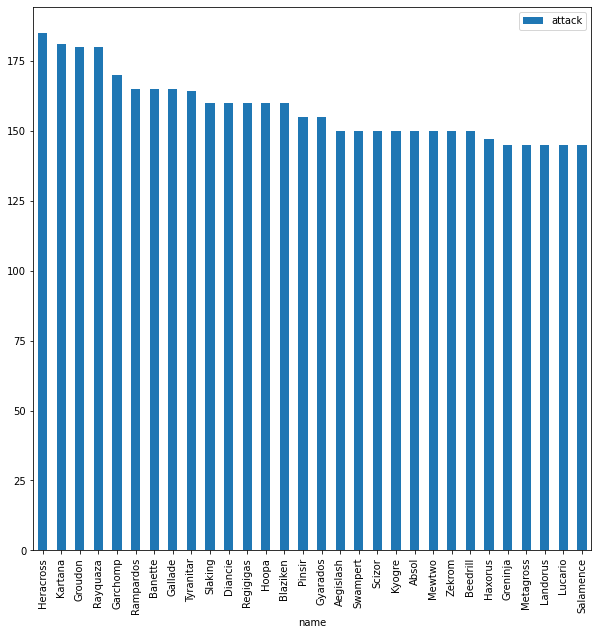

In [108]:
pa.plot(x="name", y="attack", kind="bar", fontsize= 10, figsize = (10,10))

### Best Defense

In [106]:
pokdef = pok.drop(labels = ['height_m', 'abilities', 'classfication', 'hp', 'attack', 'sp_attack', 'sp_defense', 'weight_kg', 'speed', 'base_total', 'is_legendary'], axis = 1)
pokdef.head(10)

,defense,name
0,49,Bulbasaur
1,63,Ivysaur
2,123,Venusaur
3,43,Charmander
4,58,Charmeleon
5,78,Charizard
6,65,Squirtle
7,80,Wartortle
8,120,Blastoise
9,35,Caterpie


In [107]:
pd = pokdef.sort_values('defense', ascending = False)[:30]
pd

,defense,name
305,230,Aggron
212,230,Shuckle
207,230,Steelix
376,200,Regirock
712,184,Avalugg
90,180,Cloyster
79,180,Slowbro
410,168,Bastiodon
94,160,Onix
382,160,Groudon


<AxesSubplot:xlabel='name'>

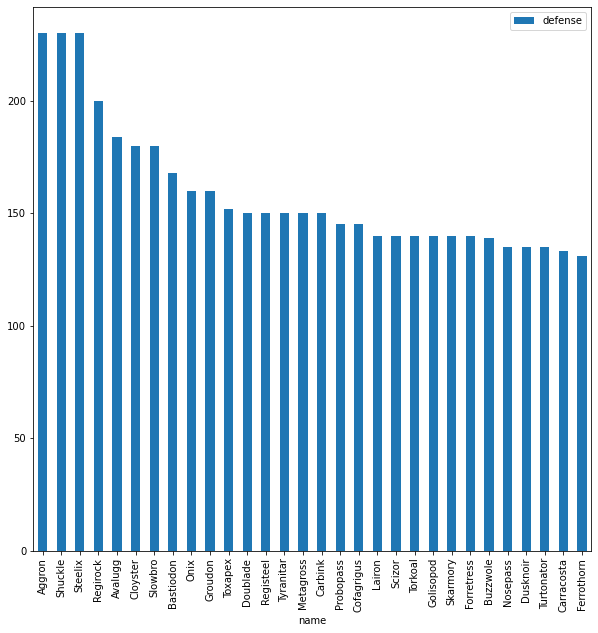

In [109]:
pd.plot(x="name", y="defense", kind="bar", fontsize= 10, figsize = (10,10))

### Best Speed

In [110]:
pokspe = pok.drop(labels = ['height_m', 'abilities', 'classfication', 'hp', 'attack', 'sp_attack', 'sp_defense', 'weight_kg', 'defense', 'base_total', 'is_legendary'], axis = 1)
pokspe.head(10)

,name,speed
0,Bulbasaur,45
1,Ivysaur,60
2,Venusaur,80
3,Charmander,65
4,Charmeleon,80
5,Charizard,100
6,Squirtle,43
7,Wartortle,58
8,Blastoise,78
9,Caterpie,45


In [111]:
ps = pokspe.sort_values('speed', ascending = False)[:30]
ps

,name,speed
385,Deoxys,180
290,Ninjask,160
794,Pheromosa,151
100,Electrode,150
141,Aerodactyl,150
64,Alakazam,150
616,Accelgor,145
253,Sceptile,145
14,Beedrill,145
149,Mewtwo,140


<AxesSubplot:xlabel='name'>

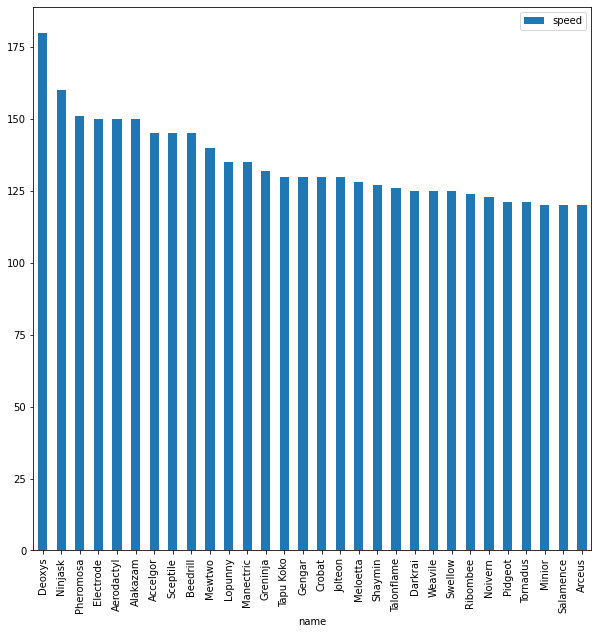

In [112]:
ps.plot(x="name", y="speed", kind="bar", fontsize= 10, figsize = (10,10))

## In Conclusion... (For Now)

So I have my legendary team. Fortunately, even if a pokemon is super effective against a legendary it can still put up a good fight. This will be of issue when I decide on a regular pokemon dream team, as most of the time they don't stand a chance against a type that is super effective against them. I plan to better elaborate on my graphs as well as try some different styles for my final submission. I'll also most likely dive more into the canon and story surrounding pokemon of interest. 